# ANN

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 278317858677172420
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4880859136
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3157136595395259102
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1660 Ti with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


2022-07-09 18:56:26.387301: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-09 18:56:26.429636: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-09 18:56:26.488043: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-09 18:56:26.488212: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

Precarga de los datos en Keras

In [1]:
from keras.datasets import mnist
from keras import utils

# Setup train and test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:10])

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)
First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [3]:
print(x_train.ndim) 
print(x_train.shape)
print(x_test.ndim) 
print(x_test.shape)

2
(60000, 784)
2
(10000, 784)


In [2]:
from keras.layers import Dense,Dropout # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/

model = Sequential()
model.add(Dense(units=100, input_shape=(784,),activation='relu'))
#model.add(Dense(units=200, activation='sigmoid'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

2022-07-10 19:03:10.251025: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


2022-07-10 19:03:10.317545: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-10 19:03:10.317848: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-10 19:03:10.319284: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-10 19:03:10.350084: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

Predicciones

In [5]:
import time
model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()
history = model.fit(x_train, y_train, 
                    batch_size=50, 
                    epochs=10, 
                    validation_data=(x_test, y_test))
print("The time used to execute this is given below")
end = time.time()
print(end - start)

Epoch 1/10


2022-07-09 18:40:47.281931: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 47040000 exceeds 10% of free system memory.
2022-07-09 18:40:47.332768: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 47040000 exceeds 10% of free system memory.


1200/1200 [==============================] - 4s 2ms/step - loss: 2.7310 - accuracy: 0.8462 - val_loss: 0.5967 - val_accuracy: 0.8755
Epoch 2/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.4177 - accuracy: 0.9035 - val_loss: 0.4012 - val_accuracy: 0.9091
Epoch 3/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.2847 - accuracy: 0.9270 - val_loss: 0.2982 - val_accuracy: 0.9316
Epoch 4/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.2419 - accuracy: 0.9376 - val_loss: 0.2966 - val_accuracy: 0.9344
Epoch 5/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.2185 - accuracy: 0.9430 - val_loss: 0.2992 - val_accuracy: 0.9304
Epoch 6/10
1200/1200 [==============================] - 2s 2ms/step - loss: 0.2043 - accuracy: 0.9459 - val_loss: 0.2513 - val_accuracy: 0.9414
Epoch 7/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.1851 - accuracy: 0.9504 - val_loss: 0.3919 - val_accuracy: 0.9361
Epo

In [6]:
import time
model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()
history = model.fit(x_train, y_train, 
                    batch_size=50, 
                    epochs=50, 
                    validation_data=(x_test, y_test))
print("The time used to execute this is given below")
end = time.time()
print(end - start)

Epoch 1/50


2022-07-09 18:41:57.326687: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 47040000 exceeds 10% of free system memory.
2022-07-09 18:41:57.374099: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 47040000 exceeds 10% of free system memory.


1200/1200 [==============================] - 2s 2ms/step - loss: 0.1636 - accuracy: 0.9583 - val_loss: 0.2555 - val_accuracy: 0.9529
Epoch 2/50
1200/1200 [==============================] - 2s 2ms/step - loss: 0.1560 - accuracy: 0.9596 - val_loss: 0.2380 - val_accuracy: 0.9509
Epoch 3/50
1200/1200 [==============================] - 2s 2ms/step - loss: 0.1508 - accuracy: 0.9608 - val_loss: 0.2359 - val_accuracy: 0.9502
Epoch 4/50
1200/1200 [==============================] - 2s 2ms/step - loss: 0.1398 - accuracy: 0.9617 - val_loss: 0.2466 - val_accuracy: 0.9501
Epoch 5/50
1200/1200 [==============================] - 2s 2ms/step - loss: 0.1385 - accuracy: 0.9635 - val_loss: 0.2580 - val_accuracy: 0.9491
Epoch 6/50
1200/1200 [==============================] - 2s 2ms/step - loss: 0.1422 - accuracy: 0.9640 - val_loss: 0.3141 - val_accuracy: 0.9524
Epoch 7/50
1200/1200 [==============================] - 3s 3ms/step - loss: 0.1323 - accuracy: 0.9663 - val_loss: 0.2538 - val_accuracy: 0.9513
Epo

In [5]:
import time
model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()
history = model.fit(x_train, y_train, 
                    batch_size=50, 
                    epochs=100, 
                    validation_data=(x_test, y_test))
print("The time used to execute this is given below")
end = time.time()
print(end - start)

Epoch 1/100
1200/1200 [==============================] - 4s 2ms/step - loss: 2.7463 - accuracy: 0.8498 - val_loss: 0.5343 - val_accuracy: 0.8870
Epoch 2/100
1200/1200 [==============================] - 3s 2ms/step - loss: 0.4045 - accuracy: 0.9029 - val_loss: 0.3898 - val_accuracy: 0.9108
Epoch 3/100
1200/1200 [==============================] - 3s 2ms/step - loss: 0.2973 - accuracy: 0.9251 - val_loss: 0.3307 - val_accuracy: 0.9237
Epoch 4/100
1200/1200 [==============================] - 2s 2ms/step - loss: 0.2433 - accuracy: 0.9363 - val_loss: 0.2655 - val_accuracy: 0.9410
Epoch 5/100
1200/1200 [==============================] - 2s 2ms/step - loss: 0.2136 - accuracy: 0.9448 - val_loss: 0.2434 - val_accuracy: 0.9418
Epoch 6/100
1200/1200 [==============================] - 3s 2ms/step - loss: 0.2020 - accuracy: 0.9465 - val_loss: 0.2392 - val_accuracy: 0.9428
Epoch 7/100
1200/1200 [==============================] - 3s 2ms/step - loss: 0.1952 - accuracy: 0.9493 - val_loss: 0.2456 - val_ac

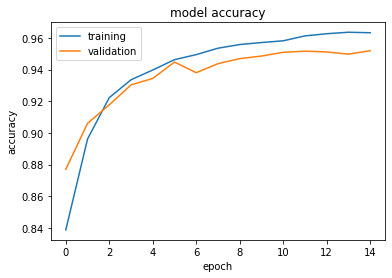

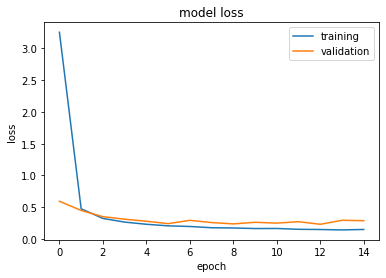

313/313 [==============================] - 1s 2ms/step - loss: 0.2881 - accuracy: 0.9519
Test loss: 0.288
Test accuracy: 0.952


In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

loss, accuracy  = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [7]:
# Guardamos el modelo
model.save('mnistANN15epochsGPU.h5')